In [1]:
#
# This notebook implements a numerical simulation of exponential decay process,
# and a model fitting to the artificial data.
#

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, integrate
from scipy.optimize import curve_fit
import math

In [3]:
#
# model description
#
def simple_decay(x, time, params):
    f = np.zeros((1,))
    f[0] = - params[0] * x[0]
    return f

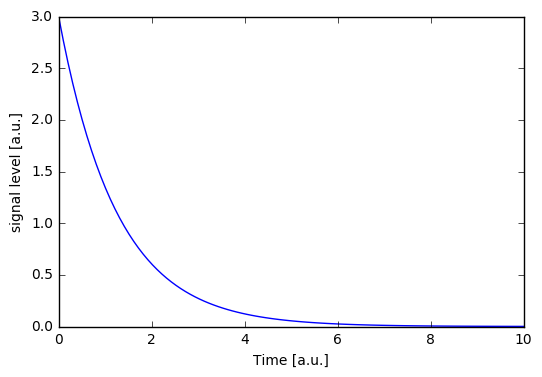

In [4]:
#
# simulate the model and visualize the result
#
params = [0.8]# decay rate
time_points = np.linspace(0, 10, 100)# define timepoints for ode solver
xinit = [3.0]# initial value
xvec = integrate.odeint(simple_decay, xinit, time_points, args=(params,))# run the ode solver
plt.plot(time_points, xvec[:, 0])
plt.xlabel('Time [a.u.]')
plt.ylabel('signal level [a.u.]')
plt.show()

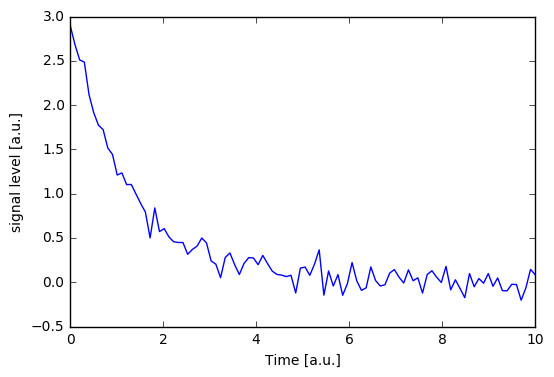

In [5]:
#
# Prepare a time-series data by adding measurement noises
#
data = xvec + 0.1 * np.random.randn(*xvec.shape)
plt.plot(time_points, data)
plt.xlabel('Time [a.u.]')
plt.ylabel('signal level [a.u.]')
plt.show()

In [6]:
#
# Defining a model function for fitting to the time series
# We use the exponential function, because it is the analytical solution of the simple decay model
#
def exponential_func(t, a, b):
    return a * np.exp(-b*t)

In [7]:
#
# Model fitting (Compare the estimated values with the ground truths)
#
popt, pcov = curve_fit(exponential_func, time_points, np.squeeze(data), p0=[1, 1])
print("Initial value: " + str(popt[0]) + " (The ground truth: " + str(xinit[0]) + ")")
print("Decay rate: " + str(popt[1]) + " (The ground truth: " + str(params[0]) + ")")

Initial value: 2.90934677384 (The ground truth: 3.0)
Decay rate: 0.776213036828 (The ground truth: 0.8)


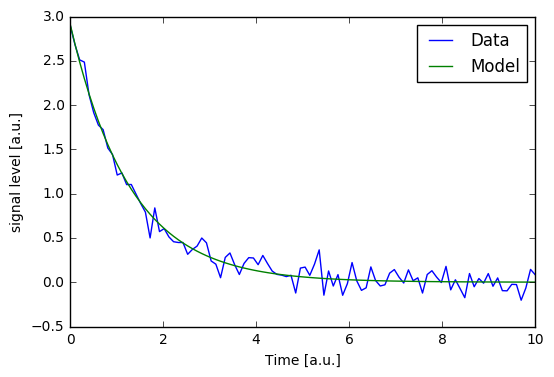

In [8]:
#
# Plotting data and model curves
#
plt.plot(time_points, data, label='Data')
plt.plot(time_points, exponential_func(time_points, *popt), label='Model')
plt.legend()
plt.xlabel('Time [a.u.]')
plt.ylabel('signal level [a.u.]')
plt.show()